In [36]:
import numpy as np
from preprocessing import *
from math import sin,cos,pi
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import os
from itertools import chain, combinations

In [ ]:
def get_Reference_Line(binarized):
    hist = np.sum(1-binarized/255,axis=1)
    referenceline = np.argmax(hist)
    return referenceline

def get_BlackWhiteRatio(binarized):
    hImg, wImg = binarized.shape
    blackCount = np.sum(binarized==0)
    whiteCount = max(1,np.sum(binarized==255))
    return blackCount/whiteCount

def get_Components(binarized):
    contours,_ = cv2.findContours(255-binarized, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_NONE)
    return contours,len(contours)

def get_CountContours(contours,referenceline):
    countAbove,countBelow=0,0
    for cnt in contours:
        x,y,w,h  = cv2.boundingRect(cnt)
        if y+h <= referenceline:countAbove+=1
        if y > referenceline:countBelow+=1
        
    return countAbove,countBelow

def get_Orientation(contours,binarized):
    hImg, wImg = binarized.shape
    test = np.zeros((hImg,wImg,3))
    test[:,:,0] = binarized
    test[:,:,1] = binarized
    test[:,:,2] = binarized
    anglesSum = 0
    for cnt in contours:
        if cnt.shape[0] > 5:
            x,y,_,_  = cv2.boundingRect(cnt)
            ellipse = cv2.fitEllipse(cnt)
            (xc,yc),(d1,d2),angle = ellipse
            angle = 90 - angle
            anglesSum += angle
            cv2.putText(test,f'{int(angle)}',(x,y),0,0.25,(0,0,255)) 
            cv2.ellipse(test, ellipse, (255,0, 255), 1, cv2.LINE_AA)
    anglesMean = anglesSum/len(contours)
    cv2.imwrite("withEllipses.png", test)
    return anglesMean

In [3]:
base_dir='ACdata_base/'

fonts = os.listdir(base_dir)
X=[]
Y=[]
for font in fonts:
    data = os.listdir(base_dir+font)
    print("curFont",font)
    for img in data:
        img_dir = base_dir+font+'/'+img
        imgGray = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
        binarizedImg =  Binarize_Histogram(imgGray,img_dir)
        features = get_Features(binarizedImg)
        X.append(features)
        Y.append(int(font))


curFont 8
curFont 5
curFont 6
curFont 7
curFont 9
curFont 3
curFont 2
curFont 1
curFont 4
training size: (1128, 7)


In [45]:
def Train_NN(X,Y):
    N = len(X[0])
    X = np.array(X)
    Y = np.array(Y)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4, stratify=Y)
    clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(9), random_state=1,solver='lbfgs',max_iter=10000)
    clf = clf.fit(x_train, y_train)
    print("Finished Fitting")
    y_pred_test = clf.predict(x_test)
    accuracy_test = np.mean(y_test==y_pred_test)
    
    y_pred_train = clf.predict(x_train)
    accuracy_train = np.mean(y_train==y_pred_train)
    print(f"accuracy_train: {accuracy_train}, accuracy_test: {accuracy_test} with {N} features")
    return accuracy_train,accuracy_test

In [46]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
features_x = list(range(7))
features_powerset = list(powerset(features_x))

In [ ]:
def reduce_features(X,featureset):
    Xnew=[]
    featureset = list(featureset)
    for x in X:
        Xnew.append(x[featureset])
    return Xnew


accuracies=[]
for featureset in features_powerset:
    accuracy_set=0
    if len(featureset)>0:
        newX = reduce_features(X,featureset)
#         print("newX",newX)
        accuracy = Train_NN(newX,Y)
        accuracies.append(accuracy)

Finished Fitting
accuracy_train: 0.2620744259699129, accuracy_test: 0.26540284360189575
Finished Fitting
accuracy_train: 0.45209817893903403, accuracy_test: 0.42890995260663506
Finished Fitting
accuracy_train: 0.4251781472684085, accuracy_test: 0.3862559241706161
Finished Fitting
accuracy_train: 0.39825811559778307, accuracy_test: 0.34360189573459715
Finished Fitting
accuracy_train: 0.3452098178939034, accuracy_test: 0.33175355450236965
Finished Fitting
accuracy_train: 0.32779097387173395, accuracy_test: 0.36729857819905215
Finished Fitting
accuracy_train: 0.23198733174980204, accuracy_test: 0.20853080568720378
Finished Fitting
accuracy_train: 0.4742676167854315, accuracy_test: 0.42417061611374407
Finished Fitting
accuracy_train: 0.47980997624703087, accuracy_test: 0.43601895734597157
Finished Fitting
accuracy_train: 0.4172604908946952, accuracy_test: 0.3815165876777251
Finished Fitting
accuracy_train: 0.45288994457640536, accuracy_test: 0.4265402843601896
Finished Fitting
accuracy_tra

Finished Fitting
accuracy_train: 0.6896278701504355, accuracy_test: 0.6706161137440758
Finished Fitting
accuracy_train: 0.6943784639746635, accuracy_test: 0.6777251184834123
Finished Fitting
accuracy_train: 0.6421219319081551, accuracy_test: 0.6374407582938388
Finished Fitting
accuracy_train: 0.6745843230403801, accuracy_test: 0.6872037914691943
Finished Fitting
accuracy_train: 0.6809184481393508, accuracy_test: 0.6563981042654028
Finished Fitting
accuracy_train: 0.620744259699129, accuracy_test: 0.5781990521327014
Finished Fitting
accuracy_train: 0.770387965162312, accuracy_test: 0.7440758293838863
Finished Fitting
accuracy_train: 0.7197149643705463, accuracy_test: 0.6895734597156398
Finished Fitting
accuracy_train: 0.7125890736342043, accuracy_test: 0.6990521327014217
Finished Fitting
accuracy_train: 0.7624703087885986, accuracy_test: 0.7322274881516587
Finished Fitting
accuracy_train: 0.6476642913697546, accuracy_test: 0.6540284360189573
Finished Fitting
accuracy_train: 0.7212984956

In [11]:
X = np.array(X)
Y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4, stratify=Y)
print("training size:",x_train.shape)

training size: (1263, 7)


In [16]:
clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(9), random_state=1,solver='lbfgs',max_iter=10000)
clf = clf.fit(x_train, y_train)
print("Finished Fitting")

Finished Fitting


[1.82701437e-05 6.90701534e-06 3.52765390e-02 1.17590960e-02
 2.88802400e-02 3.55671972e-01 2.23033730e-04 5.68160317e-01
 3.62463437e-06] 8 8
[1, 2, 3, 4, 5, 6, 7, 8, 9]


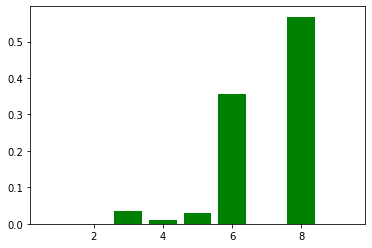

accuracy:  75.82938388625593


In [34]:
import matplotlib.pyplot as plt
test_idx=7
plt.show()
y_pred = clf.predict(x_test)
y_pred_prop = clf.predict_proba(x_test)
accuracy = np.mean(y_test==y_pred)
print(y_pred_prop[test_idx],y_pred[test_idx],y_test[test_idx])
y_axis = list(range(1,10))
plt.bar(y_axis, y_pred_prop[test_idx], color ='green')
print(y_axis)
plt.show()
print("accuracy: ",accuracy*100)